# Importing Essential Libraries

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Reading the Dataset

In [19]:
data=pd.read_csv(r"C:\Users\ganga\Downloads\churn-bigml-80.csv")

In [20]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [5]:
data.shape

(2666, 20)

## Preview of the Dataset

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

## Summary of the Dataset

In [22]:
data.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [ ]:
## Checking the Datatypes

In [31]:
data.dtypes

Account length              int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

# Data Cleaning

## Dropping Irrelevant Columns

In [23]:
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [27]:
data.drop(columns=['State','Area code'], axis=1, inplace=True)

In [28]:
data.head()

Account length International plan Voice mail plan  Number vmail messages  \
0             128                 No             Yes                     25   
1             107                 No             Yes                     26   
2             137                 No              No                      0   
3              84                Yes              No                      0   
4              75                Yes              No                      0   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   Total eve calls  Total eve charge  Total night minutes  Total night calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   Total night charge  Total intl minutes  Total intl calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   Total intl charge  Customer service calls  Churn  
0               2.70                       1  False  
1               3.70                       1  False  
2               3.29                       0  False  
3               1.78                       2  False  
4               2.73                       3  False

## Checking for Duplicates

In [36]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Length: 2666, dtype: bool

In [37]:
data.duplicated().sum()

0

## Memory Optimization

In [38]:
pre_memory=data.memory_usage().sum()
pre_memory

365370

In [39]:
for i in data.describe().columns:
    print(i,data[i].dtype)
    if 'int' in str(data[i].dtype):
        if data[i].min()>np.iinfo(np.int8).min and data[i].max()<np.iinfo(np.int8).max:
            data[i]=data[i].astype(np.int8)
        elif data[i].min()>np.iinfo(np.int16).min and data[i].max()<np.iinfo(np.int16).max:
            data[i]=data[i].astype(np.int16)
        elif data[i].min()>np.iinfo(np.int32).min and data[i].max()<np.iinfo(np.int32).max:
            data[i]=data[i].astype(np.int32)
        elif data[i].min()>np.iinfo(np.int64).min and data[i].max()<np.iinfo(np.int64).max:
            data[i]=data[i].astype(np.int64)
    elif 'float' in str(data[i].dtype):
        if data[i].min()> np.finfo(np.float16).min and data[i].max()<np.finfo(np.float16).max:
            data[i] =data[i].astype(np.float16)
        elif data[i].min()> np.finfo(np.float32).min and data[i].max()<np.finfo(np.float32).max:
            data[i] =data[i].astype(np.float32)
        elif data[i].min()> np.finfo(np.float64).min and data[i].max()<np.finfo(np.float64).max:
            data[i] =data[i].astype(np.float64)

Account length int64
Number vmail messages int64
Total day minutes float64
Total day calls int64
Total day charge float64
Total eve minutes float64
Total eve calls int64
Total eve charge float64
Total night minutes float64
Total night calls int64
Total night charge float64
Total intl minutes float64
Total intl calls int64
Total intl charge float64
Customer service calls int64


In [40]:
post_memory=data.memory_usage().sum()
post_memory

117432

### Lift Calculation

In [41]:
lift = ((pre_memory-post_memory)/pre_memory)*100
lift

67.85943016668035

## Null Value Check

In [42]:
data.isna().sum()

Account length            0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## Outlier Treatment

In [43]:
def outlier_treatment(x):
    for i in x.describe().columns:
        qrt1=np.quantile(x[i],0.25)
        qrt2=np.quantile(x[i],0.50)
        qrt3=np.quantile(x[i],0.75)
        iqrt=qrt3-qrt1
        utv=qrt3+1.5*(iqrt)
        ltv=qrt1-1.5*(iqrt)
        outlier_treated_values=[]
        for i in x[i]:
            if i<ltv or i>utv:
                outlier_treated_values.append(x[i].median())
            else:
                outlier_treated_values.append(i)
                return x
        x[i]=outlier_treated_values

In [44]:
df=outlier_treatment(data)

In [45]:
df.head()

Account length International plan Voice mail plan  Number vmail messages  \
0             128                 No             Yes                     25   
1             107                 No             Yes                     26   
2             137                 No              No                      0   
3              84                Yes              No                      0   
4              75                Yes              No                      0   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0            265.000              110          45.06250          197.37500   
1            161.625              123          27.46875          195.50000   
2            243.375              114          41.37500          121.18750   
3            299.500               71          50.90625           61.90625   
4            166.750              113          28.34375          148.25000   

   Total eve calls  Total eve charge  Total night minutes  Total night calls  \
0               99         16.781250              244.750                 91   
1              103         16.625000              254.375                103   
2              110         10.296875              162.625                104   
3               88          5.261719              196.875                 89   
4              122         12.609375              186.875                121   

   Total night charge  Total intl minutes  Total intl calls  \
0           11.007812           10.000000                 3   
1           11.453125           13.703125                 3   
2            7.320312           12.203125                 5   
3            8.859375            6.601562                 7   
4            8.406250           10.101562                 3   

   Total intl charge  Customer service calls  Churn  
0           2.699219                       1  False  
1           3.699219                       1  False  
2           3.289062                       0  False  
3           1.780273                       2  False  
4           2.730469                       3  False

# EDA

## Univariate Analysis

### Analysis of Account Length Variable

<AxesSubplot:xlabel='Account length', ylabel='Count'>

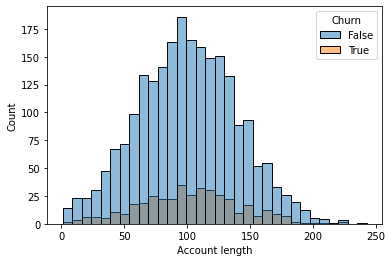

In [50]:
sns.histplot(data=df,x='Account length', hue='Churn')

### Analysis of Number vmail Messages

<AxesSubplot:xlabel='Number vmail messages', ylabel='Count'>

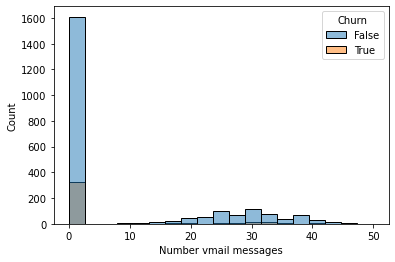

In [51]:
sns.histplot(data=df,x='Number vmail messages',hue='Churn')

### Analysis of Total Day Minutes

<AxesSubplot:xlabel='Total day minutes', ylabel='Count'>

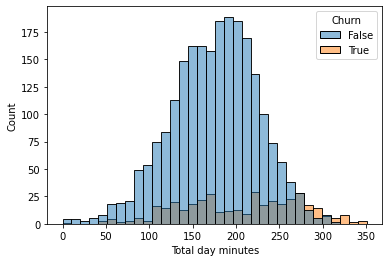

In [11]:
sns.histplot(data=df,x='Total day minutes', hue='Churn')

### Analysis of Total Day Calls

<AxesSubplot:xlabel='Total day calls', ylabel='Count'>

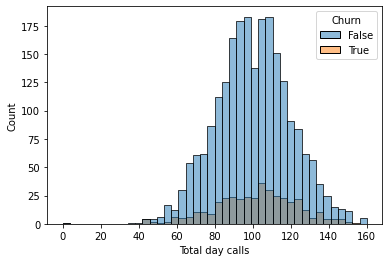

In [54]:
sns.histplot(data=df,x='Total day calls', hue='Churn')

### Analysis of Total Day Charge

<AxesSubplot:xlabel='Total day charge', ylabel='Count'>

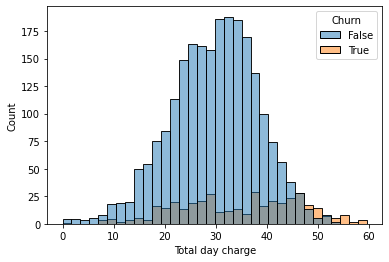

In [55]:
sns.histplot(data=df,x='Total day charge', hue='Churn')

### Analysis of Total Eve Minutes

<AxesSubplot:xlabel='Total eve minutes', ylabel='Count'>

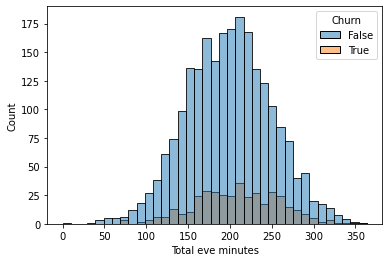

In [56]:
sns.histplot(data=df,x='Total eve minutes', hue='Churn')

### Analysis of Total Eve Calls

<AxesSubplot:xlabel='Total eve calls', ylabel='Count'>

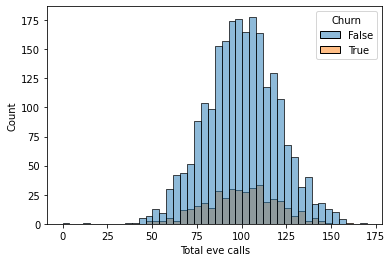

In [57]:
sns.histplot(data=df,x='Total eve calls', hue='Churn')

### Analysis of Customer Service Calls

<AxesSubplot:xlabel='Customer service calls', ylabel='Count'>

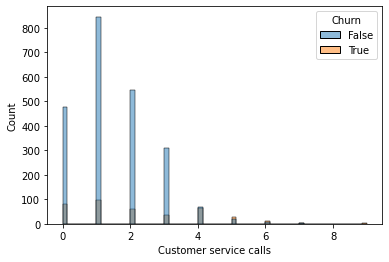

In [58]:
sns.histplot(data=df,x='Customer service calls', hue='Churn')

### Analysis of International Plan

<AxesSubplot:xlabel='International plan', ylabel='count'>

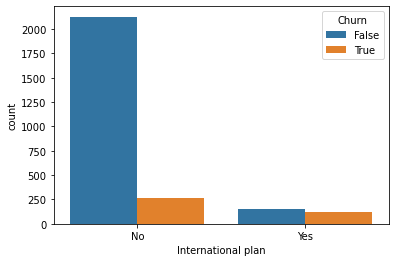

In [13]:
sns.countplot(data=df,x='International plan',hue='Churn')

### Analysis of Voice mail plan

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

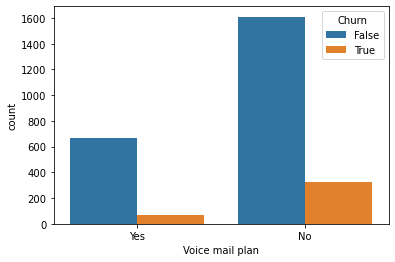

In [52]:
sns.countplot(data=df,x='Voice mail plan',hue='Churn')

## Bivariate Analysis

### Analysis of Voice Mail Plan and International Plan

In [64]:
def classvariables(df,var1,var2):
    crosstab_output=pd.crosstab(df[var1],df[var2])
    return sns.heatmap(crosstab_output,annot=True,fmt='g',cmap="viridis",linecolor='white',linewidths=4)

<AxesSubplot:xlabel='International plan', ylabel='Voice mail plan'>

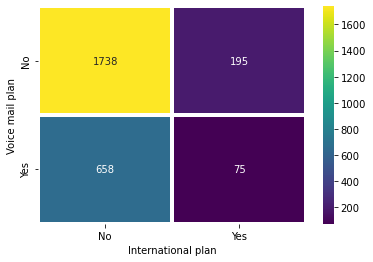

In [65]:
classvariables(df,'Voice mail plan','International plan')

## Analysis of Two Continuous Variables

In [66]:
def continousvariables(df,var1,var2,choice):
    if choice=='seaborn':
        plt.figure(figsize=(10,5))
        sns.scatterplot(df[var1],df[var2],color='r')
    else:
        plt.figure(figsize=(10,5))
        plt.scatter(df[var1],df[var2],color='r')

### Analysis of Account Length and Number Vmail Messages

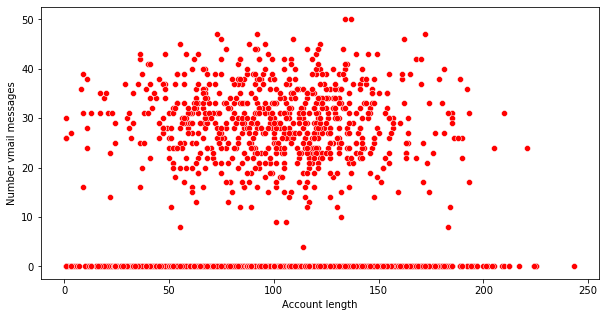

In [70]:
continousvariables(data,'Account length', 'Number vmail messages','seaborn')

### Analysis of Total Day Minutes and Total Day Calls

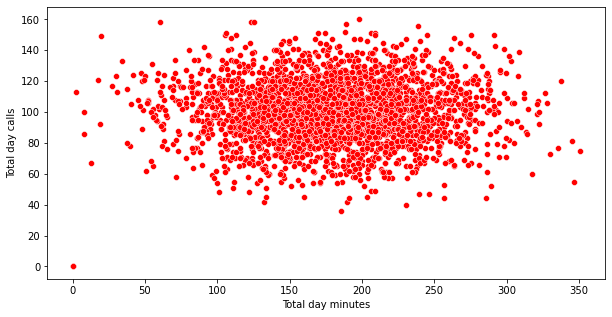

In [71]:
continousvariables(data,'Total day minutes', 'Total day calls','seaborn')

### Analysis of Total Night Minutes and Total Day Calls

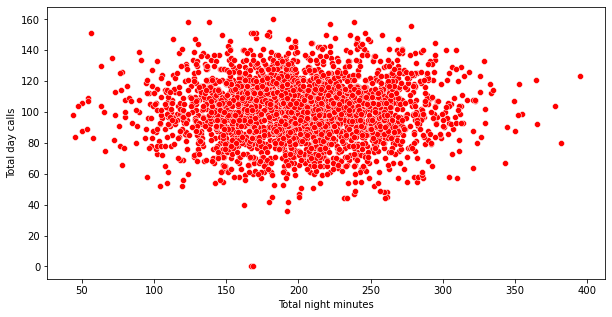

In [73]:
continousvariables(data,'Total night minutes', 'Total day calls','seaborn')

## Analysis of One Continuous and One Categorical Variable

In [74]:
def class_continous_variables(df,var1,var2,choice):
    if choice=='violin':
        plt.figure(figsize=(10,5))
        sns.violinplot(df[var1],df[var2])
    else:
        plt.figure(figsize=(10,5))
        plt.scatter(df[var1],df[var2])

### Analysis of International plan and Total day charge

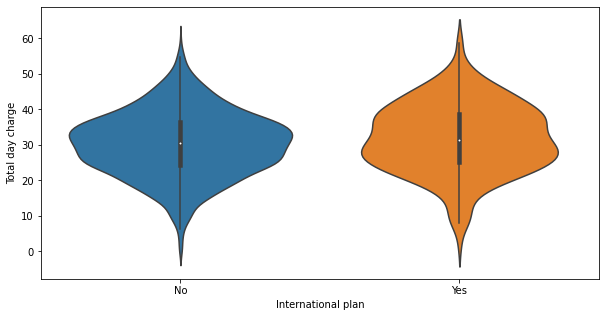

In [76]:
class_continous_variables(df,'International plan','Total day charge','violin')

### Analysis of International Plan and Total Night Minutes

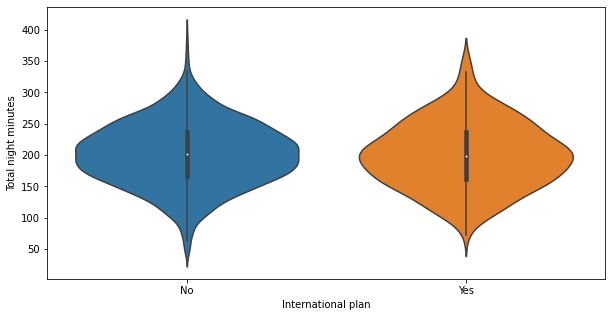

In [77]:
class_continous_variables(df,'International plan','Total night minutes','violin')

### Analysis of International Plan and Customer Service Calls

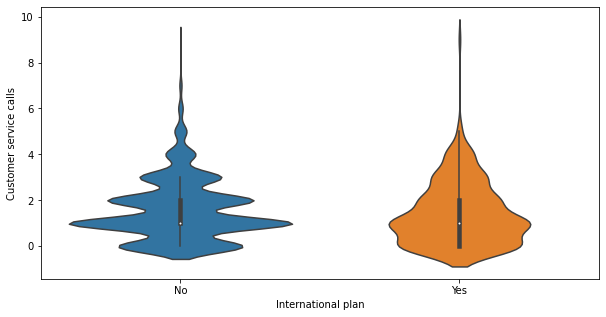

In [78]:
class_continous_variables(df,'International plan','Customer service calls','violin')

### Analysis of Voice Mail Plan and Customer Service Calls

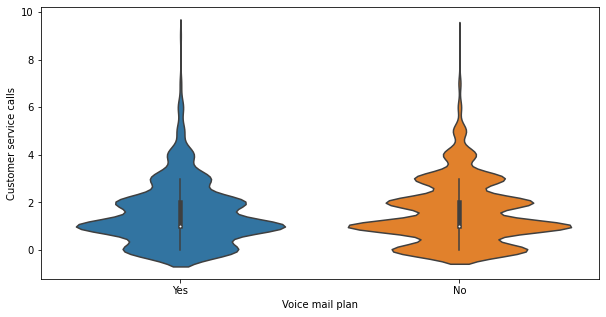

In [80]:
class_continous_variables(df,'Voice mail plan','Customer service calls','violin')

### Analysis of Voice Mail Plan and Total Day Charge

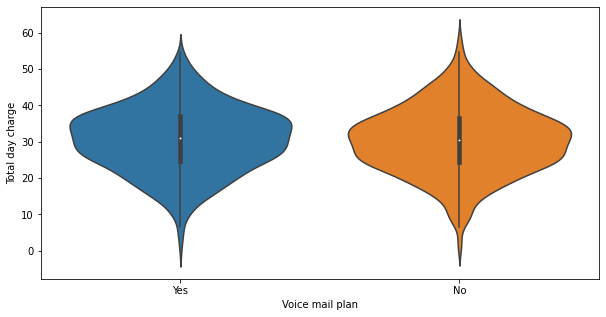

In [81]:
class_continous_variables(df,'Voice mail plan', 'Total day charge','violin')

### Analysis of Voice Mail Plan and Total Night Charge

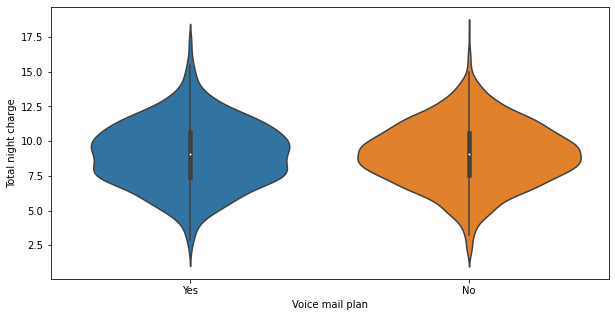

In [82]:
class_continous_variables(df,'Voice mail plan','Total night charge','violin')

## Multivariate Analysis

### Checking Traget Variable Distribution 

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

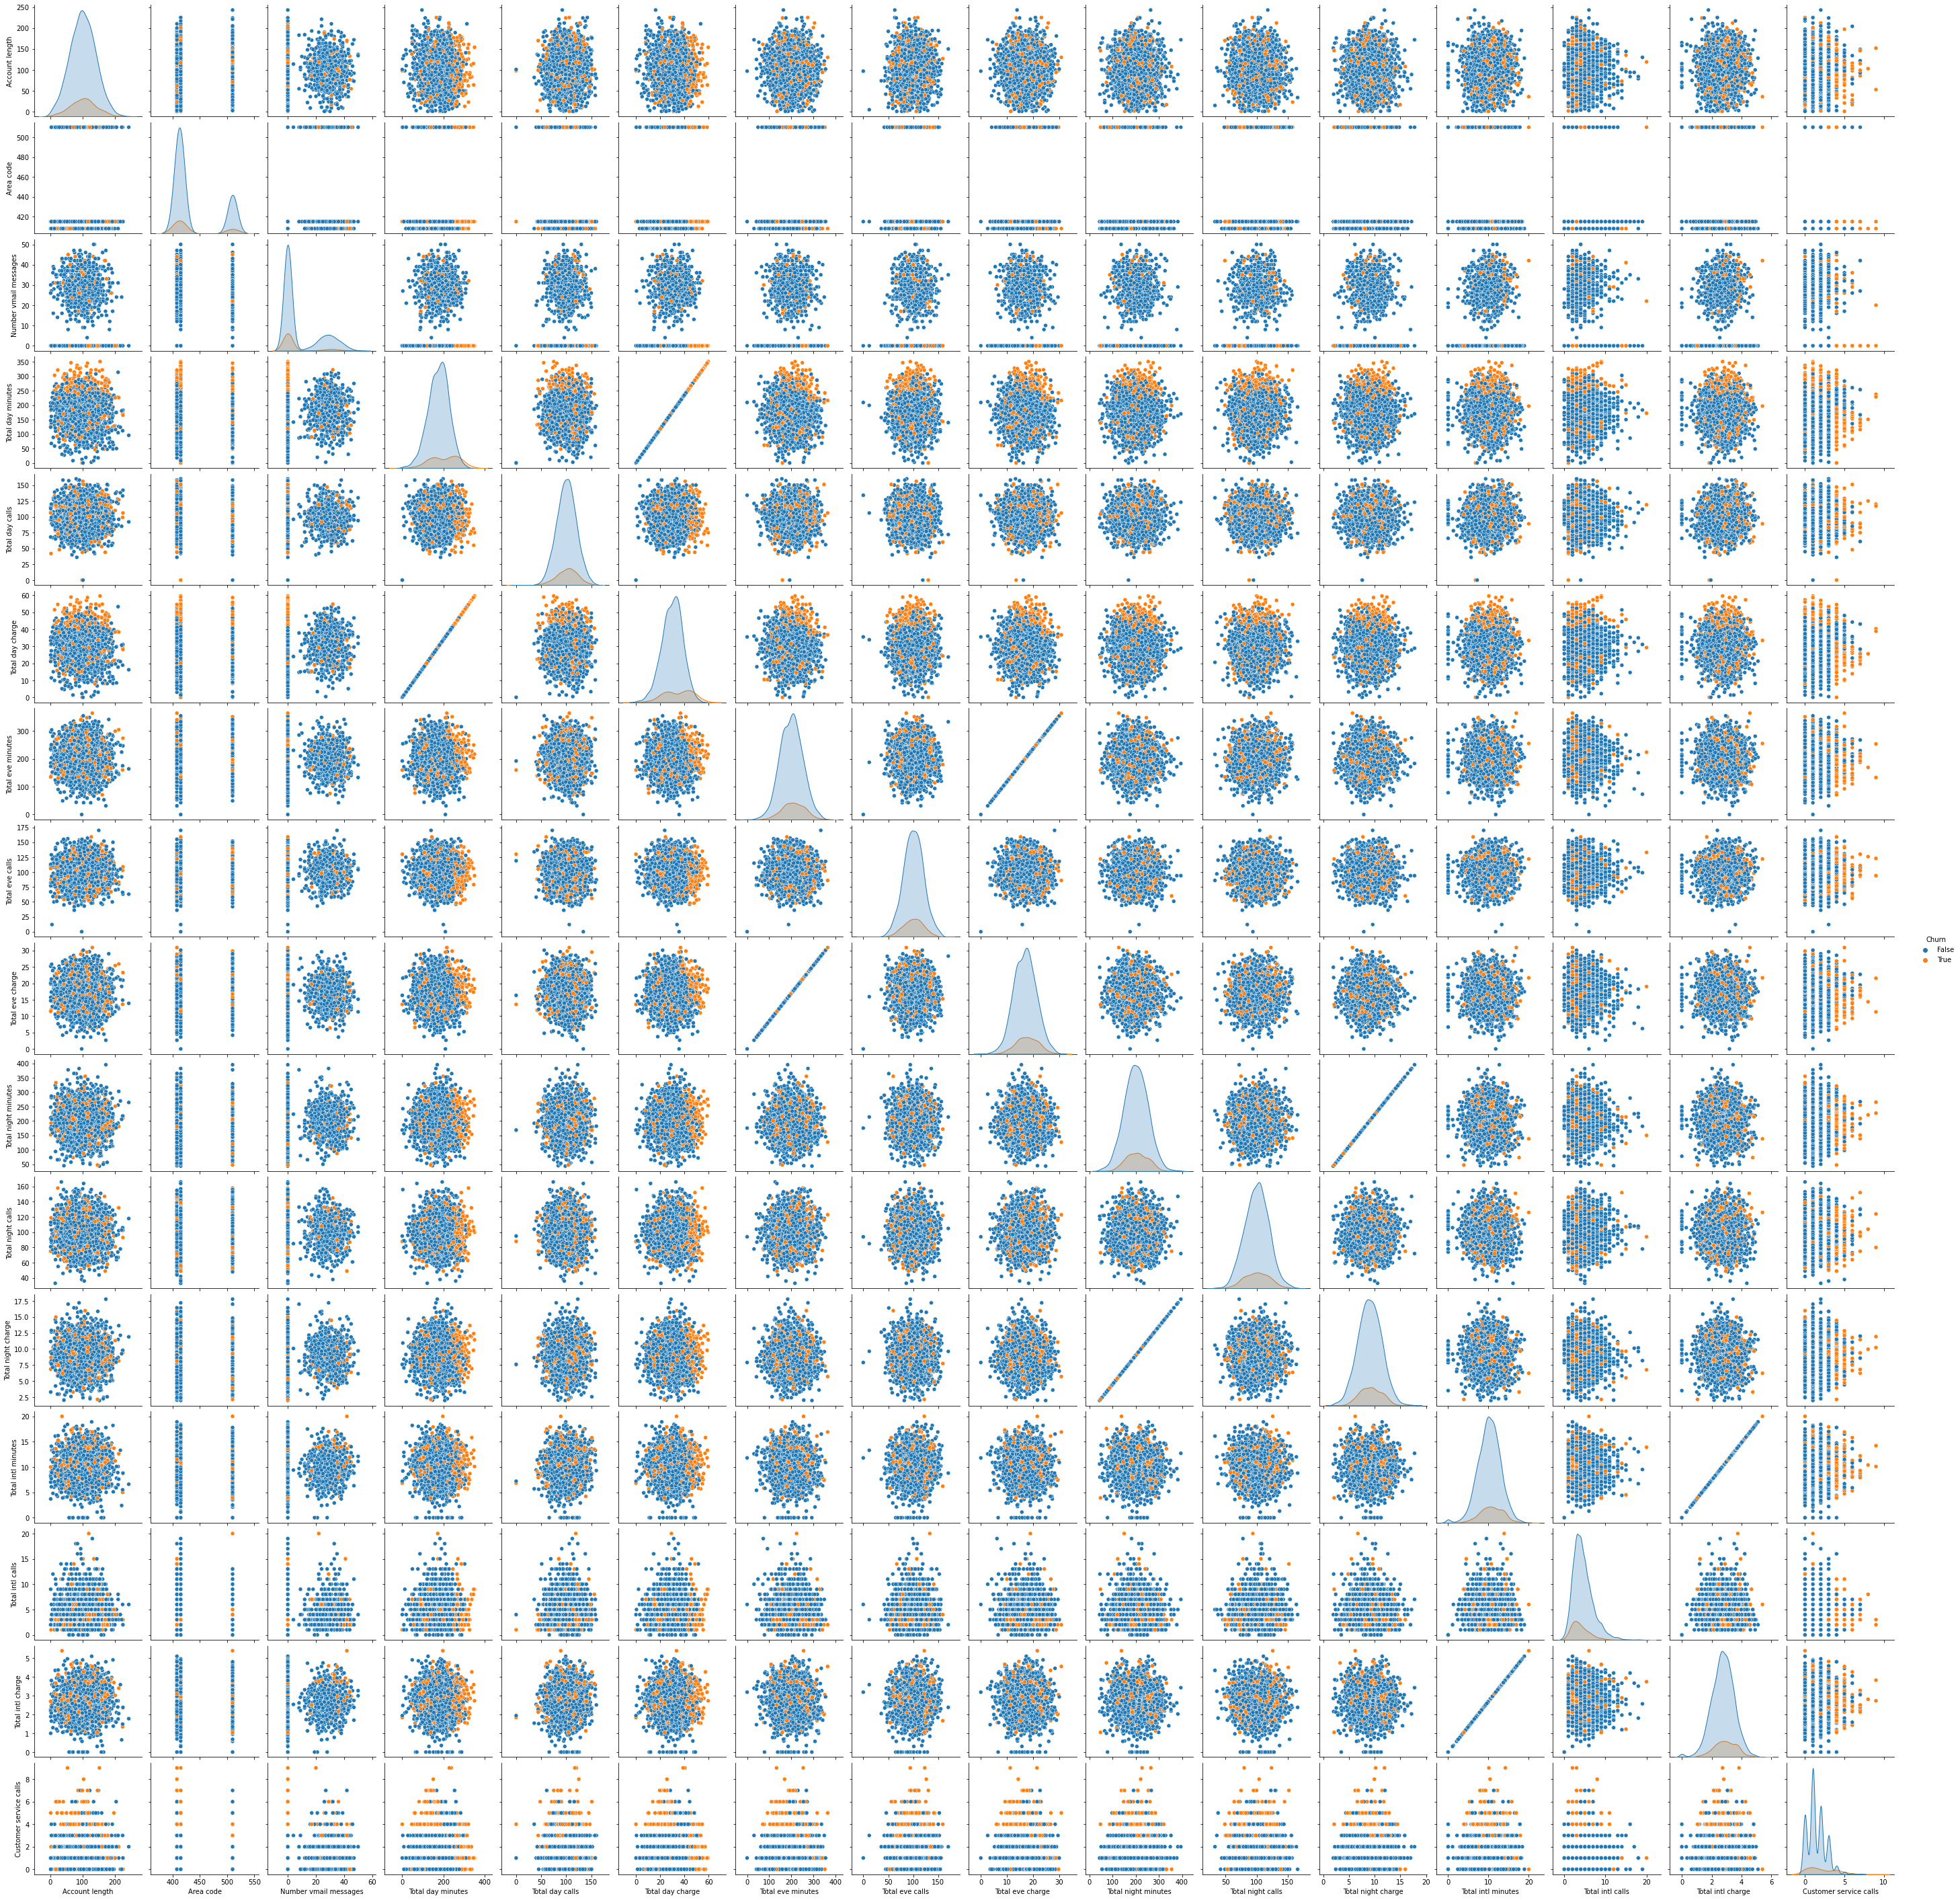

In [24]:
plt.figure(figsize=(20,10))
sns.pairplot(df, hue='Churn')

### Checking Correlation

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

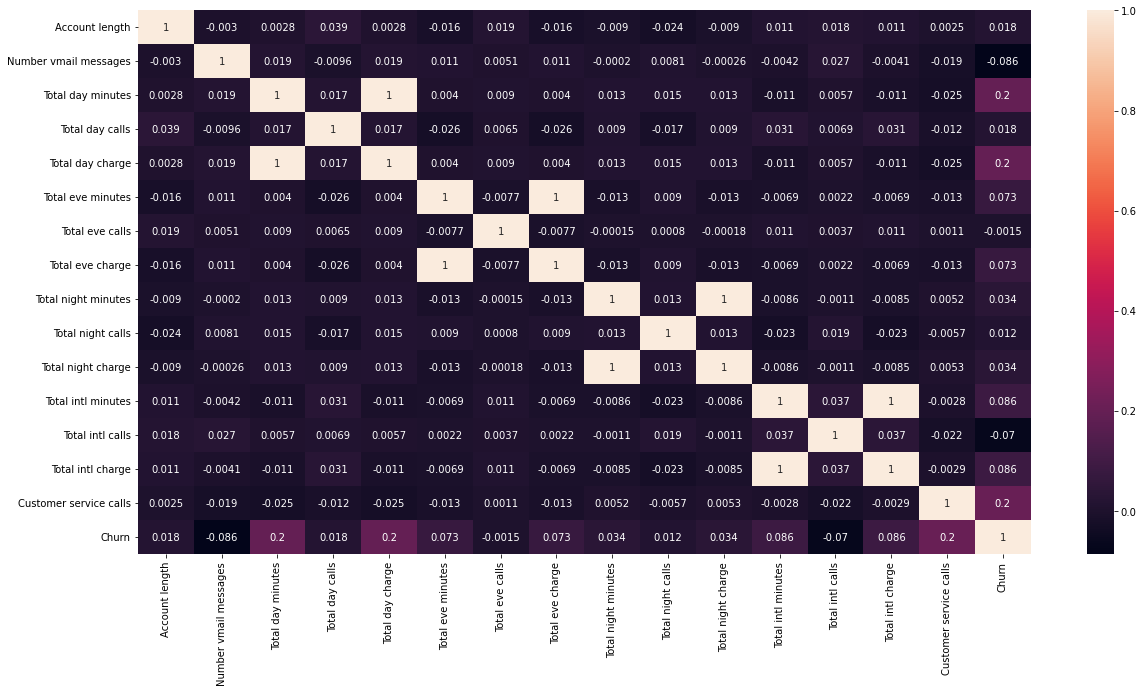

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

## Label Encoding

### International Plan

In [84]:
LE=LabelEncoder()
LE.fit(df['International plan'])
LE.transform(df['International plan'])
df['International plan']=LE.transform(df['International plan'])

LabelEncoder()

array([0, 0, 0, ..., 0, 0, 0])

### Voice mail plan

In [85]:
LE=LabelEncoder()
LE.fit(df['Voice mail plan'])
LE.transform(df['Voice mail plan'])
df['Voice mail plan']=LE.transform(df['Voice mail plan'])

LabelEncoder()

array([1, 1, 0, ..., 0, 0, 1])

### Churn

In [87]:
LE=LabelEncoder()
LE.fit(df['Churn'])
LE.transform(df['Churn'])
df['Churn']=LE.transform(df['Churn'])

LabelEncoder()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
df.head()

Account length  International plan  Voice mail plan  Number vmail messages  \
0             128                   0                1                     25   
1             107                   0                1                     26   
2             137                   0                0                      0   
3              84                   1                0                      0   
4              75                   1                0                      0   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0            265.000              110          45.06250          197.37500   
1            161.625              123          27.46875          195.50000   
2            243.375              114          41.37500          121.18750   
3            299.500               71          50.90625           61.90625   
4            166.750              113          28.34375          148.25000   

   Total eve calls  Total eve charge  Total night minutes  Total night calls  \
0               99         16.781250              244.750                 91   
1              103         16.625000              254.375                103   
2              110         10.296875              162.625                104   
3               88          5.261719              196.875                 89   
4              122         12.609375              186.875                121   

   Total night charge  Total intl minutes  Total intl calls  \
0           11.007812           10.000000                 3   
1           11.453125           13.703125                 3   
2            7.320312           12.203125                 5   
3            8.859375            6.601562                 7   
4            8.406250           10.101562                 3   

   Total intl charge  Customer service calls  Churn  
0           2.699219                       1      0  
1           3.699219                       1      0  
2           3.289062                       0      0  
3           1.780273                       2      0  
4           2.730469                       3      0

# Model Training

In [97]:
y=df['Churn']
x=df.drop('Churn', axis=1)

## Checking the Imbalance

In [103]:
y.value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [101]:
smote=SMOTE()
X,Y=smote.fit_resample(x,y)

In [102]:
Y.value_counts()

0    2278
1    2278
Name: Churn, dtype: int64

## Train Test Split

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

In [105]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3189, 17), (1367, 17), (3189,), (1367,))

## Standardizing the Data

In [106]:
def standard_scale(x):
    df_numerical=x[x.describe().columns]
    mn=StandardScaler()
    mn.fit(df_numerical)
    mn.transform(df_numerical)
    df_Standard_Scale=pd.DataFrame(mn.transform(df_numerical),columns=df_numerical.columns)
    return df_Standard_Scale

In [113]:
X_train=standard_scale(X_train)
X_test=standard_scale(X_test)

In [114]:
X_train.head()
X_test.head()

Account length  International plan  Voice mail plan  Number vmail messages  \
0        0.819033           -0.332229        -0.489295              -0.548981   
1        0.162263            3.009973        -0.489295              -0.548981   
2        0.135992           -0.332229        -0.489295              -0.548981   
3       -0.573320           -0.332229         2.043758               0.830225   
4        0.398700           -0.332229        -0.489295              -0.548981   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0           1.575049        -0.276859          1.572749           0.700246   
1          -0.916272         0.297438         -0.915977          -0.406700   
2          -0.483978        -0.329068         -0.485120           1.478371   
3          -0.348759         0.715109         -0.348029           0.815710   
4          -0.488076        -1.112201         -0.488133          -0.474472   

   Total eve calls  Total eve charge  Total night minutes  Total night calls  \
0         1.517138          0.701331            -0.205451          -0.439521   
1        -0.576673         -0.406146             0.767346           1.222325   
2         0.980263          1.480257             0.406387          -1.886936   
3        -0.361923          0.812079             0.168308           0.739854   
4        -0.630360         -0.474440            -0.735370          -1.565288   

   Total night charge  Total intl minutes  Total intl calls  \
0           -0.206423           -0.645332         -0.927280   
1            0.767774            0.936742         -0.927280   
2            0.408672           -0.642324         -0.499336   
3            0.170456           -0.525022         -0.927280   
4           -0.734410           -0.293426         -0.927280   

   Total intl charge  Customer service calls  
0          -0.649052               -0.487465  
1           0.932906                0.921896  
2          -0.635126               -1.192146  
3          -0.520935               -0.487465  
4          -0.295339                3.035938

Account length  International plan  Voice mail plan  Number vmail messages  \
0        0.976199           -0.325557        -0.474247               1.981246   
1        1.001847           -0.325557         2.108605               2.387639   
2       -0.229233           -0.325557        -0.474247              -0.538389   
3       -0.973010           -0.325557        -0.474247              -0.538389   
4        1.848214           -0.325557        -0.474247              -0.538389   

   Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0           2.130504        -0.523610          2.129353           1.584848   
1          -0.086815        -0.102752         -0.086921           0.725268   
2           2.196570         0.475928          2.196145          -0.851062   
3           0.933069         0.791572          0.933172           0.595422   
4          -1.130442        -1.312719         -1.131302           1.465390   

   Total eve calls  Total eve charge  Total night minutes  Total night calls  \
0         0.366354          1.584262             0.178801           0.580338   
1         0.855209          0.724945             0.605811           0.256357   
2         0.420671         -0.852379            -0.730916          -0.121621   
3         0.963844          0.595093             1.443918          -0.769583   
4         0.637940          1.465867             1.056691           0.796325   

   Total night charge  Total intl minutes  Total intl calls  \
0            0.178882           -1.451136         -0.927140   
1            0.606192            0.024038          0.382158   
2           -0.732835           -1.124675         -1.363572   
3            1.442394            0.344396         -0.490707   
4            1.055604            1.976698          0.382158   

   Total intl charge  Customer service calls  
0          -1.451288               -0.497108  
1           0.030324                0.848528  
2          -1.119373               -0.497108  
3           0.338228               -0.497108  
4           1.985092                0.848528

# Model Building

## Decision Tree

In [133]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
DTC.predict(X_test)

DecisionTreeClassifier()

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

### Evaluation

In [135]:
Accuracy=accuracy_score(Y_test,DTC.predict(X_test))
Accuracy

0.8675932699341624

In [136]:
Report = classification_report(Y_test,DTC.predict(X_test))
print(Report)

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       669
           1       0.88      0.86      0.87       698

    accuracy                           0.87      1367
   macro avg       0.87      0.87      0.87      1367
weighted avg       0.87      0.87      0.87      1367



array([[584,  85],
       [ 96, 602]], dtype=int64)

<AxesSubplot:>

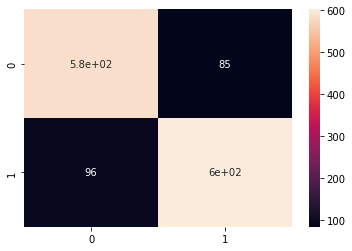

In [137]:
Matrix=confusion_matrix(Y_test,DTC.predict(X_test))
Matrix
sns.heatmap(Matrix, annot=True)

## Random Forest

In [138]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
RFC.predict(X_test)

RandomForestClassifier()

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

### Evaluation

In [140]:
Accuracy=accuracy_score(Y_test,RFC.predict(X_test))
Accuracy

0.9400146305779078

In [142]:
Report = classification_report(Y_test,RFC.predict(X_test))
print(Report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       669
           1       0.97      0.91      0.94       698

    accuracy                           0.94      1367
   macro avg       0.94      0.94      0.94      1367
weighted avg       0.94      0.94      0.94      1367



array([[648,  21],
       [ 61, 637]], dtype=int64)

<AxesSubplot:>

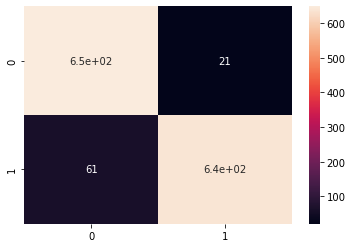

In [143]:
Matrix=confusion_matrix(Y_test,RFC.predict(X_test))
Matrix
sns.heatmap(Matrix, annot=True)

## Logistic Regression

In [118]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)
LR.predict(X_test)

LogisticRegression()

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### Model Evaluation

In [125]:
Accuracy=accuracy_score(Y_test,LR.predict(X_test))
Accuracy

0.7410387710314558

In [128]:
Report = classification_report(Y_test,LR.predict(X_test))
print(Report)

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       669
           1       0.75      0.75      0.75       698

    accuracy                           0.74      1367
   macro avg       0.74      0.74      0.74      1367
weighted avg       0.74      0.74      0.74      1367



array([[490, 179],
       [175, 523]], dtype=int64)

<AxesSubplot:>

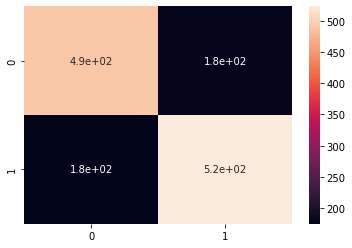

In [131]:
Matrix=confusion_matrix(Y_test,LR.predict(X_test))
Matrix
sns.heatmap(Matrix, annot=True)